In [6]:
import pickle
from multiprocessing import Pool

with open("/home/fengchen/md4/md4/data_dir/text8/text8_vocab.pkl", "rb") as f:
    vocab = pickle.load(f)

In [7]:
def post_process(texts):
    concated = " ".join(texts)
    generated_words = concated.split()
    s = 0
    for word in generated_words:
        if word in vocab:
            s += 1
    return s / len(generated_words)

In [11]:
with open("/home/fengchen/md4/md4/expt_mixed/informed_corrector_generations_256.pkl", "rb") as f:
    results_dict = pickle.load(f)
with Pool(128) as p:
    acc_dict = dict(
        zip(results_dict.keys(), p.map(post_process, results_dict.values()))
    )

In [12]:
with open(
    "/home/fengchen/md4/md4/expt_mixed/informed_corrector_generations_256_acc.pkl", "wb"
) as f:
    pickle.dump(acc_dict, f)

In [15]:
max(acc_dict.values())

0.9531424916040301

In [13]:
meta_dict = {}
timestep_list = [16, 32, 64, 128, 256]
for timesteps in timestep_list:
    with open(
        f"/home/fengchen/md4/md4/expt_mixed/informed_corrector_generations_{timesteps}_acc.pkl",
        "rb",
    ) as f:
        results_dict = pickle.load(f)
    meta_dict[timesteps] = results_dict

In [14]:
for timesteps in timestep_list:
    meta_dict[timesteps] = max(meta_dict[timesteps].values())

In [15]:
with open(
    "/home/fengchen/md4/md4/expt_mixed/informed_corrector_generations_acc_max.pkl", "wb"
) as f:
    pickle.dump(meta_dict, f)

In [16]:
with open("/home/fengchen/md4/md4/expt_mixed/uninformed_corrector_generations.pkl", "rb") as f:
    results_dict = pickle.load(f)

with Pool(128) as p:
    acc_dict = dict(
        zip(results_dict.keys(), p.map(post_process, results_dict.values()))
    )

with open(
    "/home/fengchen/md4/md4/expt_mixed/uninformed_corrector_generations_acc.pkl", "wb"
) as f:
    pickle.dump(acc_dict, f)

In [17]:
timestep_list = [16, 32, 64, 128, 256]

In [18]:
new_dict = {}
for timesteps in timestep_list:
    new_dict[timesteps] = max(
        [acc_dict[timesteps, step_size] for step_size in [0.5, 1.0, 2.0, 4.0]]
    )
with open(
    "/home/fengchen/md4/md4/expt_mixed/uninformed_corrector_generations_acc_max.pkl", "wb"
) as f:
    pickle.dump(new_dict, f)

In [19]:
with open("/home/fengchen/md4/md4/expt_mixed/maskgit_generations.pkl", "rb") as f:
    results_dict = pickle.load(f)

with Pool(128) as p:
    acc_dict = dict(
        zip(results_dict.keys(), p.map(post_process, results_dict.values()))
    )

with open("/home/fengchen/md4/md4/expt_mixed/maskgit_generations_acc.pkl", "wb") as f:
    pickle.dump(acc_dict, f)

In [20]:
timestep_list = [16, 32, 64, 128, 256]
for timesteps in timestep_list:
    new_dict[timesteps] = max(
        [
            acc_dict[timesteps, tem]
            for tem in [0.5, 1.0, 2.0, 4.0, 8.0, 10.0, 12.0, 16.0, 20.0, 40.0]
        ]
    )
with open("/home/fengchen/md4/md4/expt_mixed/maskgit_generations_acc_max.pkl", "wb") as f:
    pickle.dump(new_dict, f)

In [23]:
# get all four acc_max
import pickle

meta_results_dict = {}
with open(
    "/home/fengchen/md4/md4/expt_mixed/maskgit_generations_acc_max.pkl", "rb"
) as f:
    meta_results_dict["maskgit"] = pickle.load(f)
with open(
    "/home/fengchen/md4/md4/expt_mixed/informed_corrector_generations_acc_max.pkl", "rb"
) as f:
    meta_results_dict["informed_corrector"] = pickle.load(f)
with open(
    "/home/fengchen/md4/md4/expt_mixed/uninformed_corrector_generations_acc_max.pkl",
    "rb",
) as f:
    meta_results_dict["uninformed_corrector"] = pickle.load(f)
with open("/home/fengchen/md4/md4/expt_mixed/baseline_acc.pkl", "rb") as f:
    meta_results_dict["baseline"] = pickle.load(f)

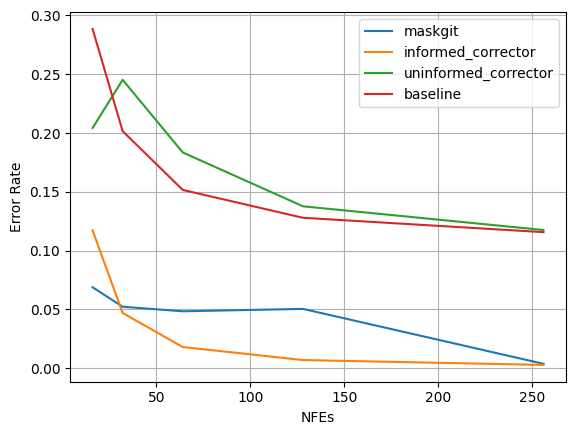

In [24]:
from matplotlib import pyplot as plt
import numpy as np

timestep_list = [16, 32, 64, 128, 256]
for key, value in meta_results_dict.items():
    plt.plot(
        timestep_list,
        1 - np.array([value[timestep] for timestep in timestep_list]),
        label=key,
    )
plt.legend()
plt.ylabel("Error Rate")
plt.xlabel("NFEs")
plt.grid()

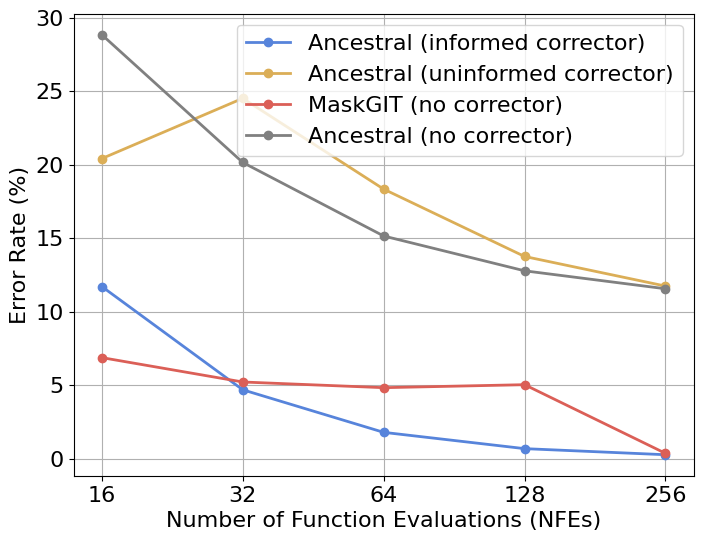

In [26]:
import math
import seaborn as sns
from matplotlib import ticker

# palette = sns.color_palette("tab10", n_colors=10)
palette = sns.color_palette("hls", n_colors=10)

# The parameters are kind of confusing here
method_mapping = {
    ("gibbs", 0, "gibbs"): "Ancestral (no corrector)",
    ("gibbs", 1, "gibbs"): "Ancestral (informed corrector)",
    ("euler", 1, "forward_backward"): "Ancestral (uninformed corrector)",
    ("maskgit", 0, "none"): "MaskGIT (no corrector)",
}

color_mapping = {
    ("gibbs", 0, "gibbs"): "grey",
    ("gibbs", 1, "gibbs"): palette[6],
    ("euler", 1, "forward_backward"): palette[1],
    ("maskgit", 0, "none"): palette[0],
}


# Apply mapping function to correctly label methods
def get_corrected_method_label(row):
    key = (row["method"], row["num_cstep"], row["corrector"])
    return method_mapping.get(key, "Other")


# Plot with all four groups
fig = plt.figure(figsize=(8, 6))

# for label, group in corrected_filtered_df.groupby("method_label"):
#     group = group.sort_values("NFE")
#     plt.plot(group["NFE"], group["fid"], marker="o", linestyle="-",
#              label=label, linewidth=2,
#              color=color_mapping.get(tuple(group[["method", "num_cstep", "corrector"]].iloc[0])))
label_mapping = {
    "informed_corrector": "Ancestral (informed corrector)",
    "uninformed_corrector": "Ancestral (uninformed corrector)",
    "baseline": "Ancestral (no corrector)",
    "maskgit": "MaskGIT (no corrector)",
}

for ii, key in enumerate(
    ["informed_corrector", "uninformed_corrector", "maskgit", "baseline"]
):
    plt.plot(
        timestep_list,
        100
        - 100
        * np.array([meta_results_dict[key][timestep] for timestep in timestep_list]),
        label=label_mapping[key],
        marker="o",
        linestyle="-",
        linewidth=2,
        color=[palette[6], palette[1], palette[0], "grey"][ii],
    )

plt.xlabel("Number of Function Evaluations (NFEs)", fontsize=16)
plt.ylabel("Error Rate (%)", fontsize=16)
# plt.title("Comparison of Diffusion Sampling Methods")
# plt.legend()

# Define the desired order of legend entries


# Apply the ordered legend
plt.legend(fontsize=16)


plt.xscale("log")
plt.yticks(fontsize=16)
plt.xticks([16, 32, 64, 128, 256], fontsize=16)
plt.gca().get_xaxis().set_major_formatter(ticker.ScalarFormatter())
plt.minorticks_off()
plt.grid(True)
plt.show()

fig.savefig("sampling_methods_text8_small.pdf", bbox_inches="tight")

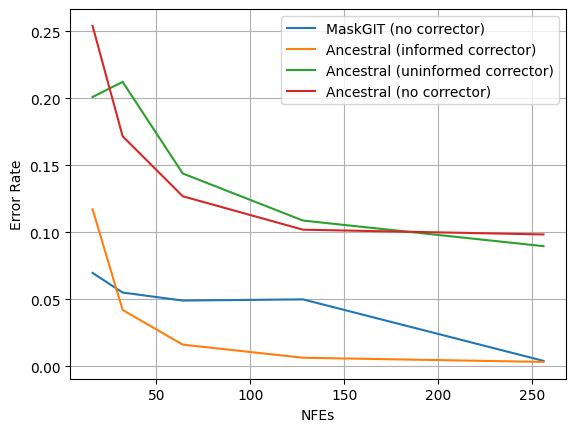

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import ticker

# Define the mapping between keys and descriptive labels
label_mapping = {
    "informed_corrector": "Ancestral (informed corrector)",
    "uninformed_corrector": "Ancestral (uninformed corrector)",
    "baseline": "Ancestral (no corrector)",
    "maskgit": "MaskGIT (no corrector)",
}

timestep_list = [16, 32, 64, 128, 256]
for key, value in meta_results_dict.items():
    plt.plot(
        timestep_list,
        1 - np.array([value[timestep] for timestep in timestep_list]),
        label=label_mapping[key],
    )
plt.legend()
plt.ylabel("Error Rate")
plt.xlabel("NFEs")
plt.grid()

In [20]:
with open(
    "/root/md4/data_dir/text8/informed_corrector_generations_32_acc.pkl", "rb"
) as f:
    results_dict = pickle.load(f)

In [21]:
results_dict

{(1, 0.1): 0.904065390406539,
 (1, 1.0): 0.8800309597523219,
 (1, 2.0): 0.8369433897134967,
 (1, 10.0): 0.772189863513866,
 (1, 1000.0): 0.7615160856162897,
 (2, 0.1): 0.9350966690958975,
 (2, 1.0): 0.9271560025679435,
 (2, 2.0): 0.8891309920533197,
 (2, 10.0): 0.798390237569778,
 (2, 1000.0): 0.7821040322231365,
 (4, 0.1): 0.9580700506339708,
 (4, 1.0): 0.7615160856162897,
 (4, 2.0): 0.9347062853228293,
 (4, 10.0): 0.813671587514611,
 (4, 1000.0): 0.7821040322231365,
 (8, 0.1): 0.9566152597402597,
 (8, 1.0): 0.9532112023583912,
 (8, 2.0): 0.9461368277739959,
 (8, 10.0): 0.8407232027550581,
 (8, 1000.0): 0.8010197411426331,
 (16, 0.1): 0.9349056230461794,
 (16, 1.0): 0.933620159803319,
 (16, 2.0): 0.9360852197070573,
 (16, 10.0): 0.8419837537409149,
 (16, 1000.0): 0.7876209398756047}

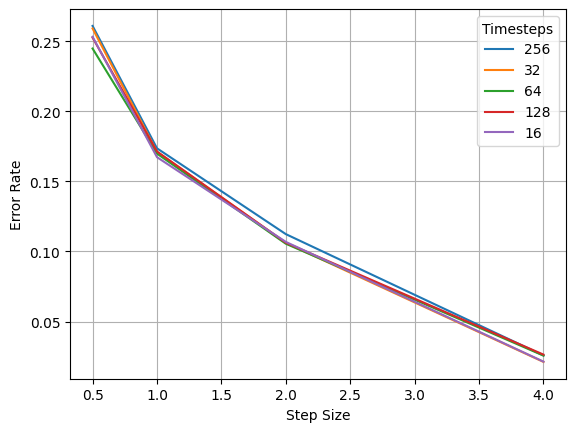

In [26]:
with open(
    "/root/md4/data_dir/text8/uninformed_corrector_generations_acc.pkl", "rb"
) as f:
    results_dict = pickle.load(f)

x_list = []
y_list = []
value_list = []
for key, value in results_dict.items():
    x_list.append(key[0])
    y_list.append(key[1])
    value_list.append(value)

# plot those with the sample x values and plot curves with different y values
x_list = np.array(x_list)
y_list = np.array(y_list)
value_list = np.array(value_list)

for x in set(x_list):
    plt.plot(y_list[x_list == x], 1 - value_list[x_list == x], label=f"{x}")
plt.legend(title="Timesteps")
plt.xlabel("Step Size")
plt.ylabel("Error Rate")
plt.grid()
plt.show()

In [2]:
with open("/root/md4/data_dir/text8/uninformed_corrector_generations.pkl", "rb") as f:
    results_dict = pickle.load(f)

In [19]:
texts = results_dict[16, 0.5]

In [21]:
concated = " ".join(texts)
generated_words = concated.split()
s = 0
for word in generated_words:
    if word in vocab:
        s += len(word) + 1
s / len(concated)

0.5581952075876063

In [16]:
"te" in vocab

True

In [13]:
concated

'                            our                        e co te                    e s ae          ee  ly ae                        he                                    ee  ly ae                           iee tee                                                                                              e  on                      e  an                                                                                                                               e  an                    and te           e  in                                                                                                                                                 iee tee                                                                   e the               e ment     r men                                                       iee of the                                                               he                   e  on                                                                          our 

In [12]:
generated_words

['our',
 'e',
 'co',
 'te',
 'e',
 's',
 'ae',
 'ee',
 'ly',
 'ae',
 'he',
 'ee',
 'ly',
 'ae',
 'iee',
 'tee',
 'e',
 'on',
 'e',
 'an',
 'e',
 'an',
 'and',
 'te',
 'e',
 'in',
 'iee',
 'tee',
 'e',
 'the',
 'e',
 'ment',
 'r',
 'men',
 'iee',
 'of',
 'the',
 'he',
 'e',
 'on',
 'our',
 'e',
 'in',
 'e',
 't',
 'our',
 'e',
 'ere',
 'iee',
 'tee',
 'our',
 'he',
 'e',
 'the',
 'he',
 'e',
 'in',
 'e',
 'ing',
 't',
 'ee',
 'an',
 'ingh',
 'e',
 'in',
 'e',
 'ine',
 'tee',
 'ing',
 't',
 'e',
 'ine',
 'tee',
 'he',
 'e',
 'wo',
 'e',
 'he',
 'e',
 'an',
 'e',
 'iee',
 'tee',
 'e',
 'external',
 'i',
 's',
 'e',
 'in',
 'e',
 'e',
 'on',
 'e',
 'our',
 'e',
 's',
 'ee',
 'and',
 'to',
 'e',
 'an',
 'e',
 'an',
 'an',
 'iee',
 'tee',
 'e',
 'on',
 'e',
 's',
 'ae',
 'and',
 'te',
 'o',
 'k',
 'e',
 'in',
 'e',
 'e',
 'be',
 'ine',
 'tee',
 'and',
 'te',
 'iee',
 'tee',
 'ine',
 'tee',
 'e',
 's',
 'ae',
 'ing',
 't',
 'e',
 'an',
 'he',
 'e',
 's',
 'ae',
 'iee',
 'tee',
 'e',
 'an',
 '